<a href="https://colab.research.google.com/github/poojaojha-ai/AIHC-5010-Winter-2026/blob/main/Revision_AIHC5010_Week_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Jupyter notebook that implements a perceptron and trains the model on an example dataset

Dataset 1: a linearly separable dataset

Dataset 2: a model of the XOR problem

Extra credit: create a simple model that can be trained to solve XOR

In [1]:
# Dataset 1: Linearly Separable Data
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(n_samples=100):
    # Class 1
    x_1 = np.random.randn(n_samples // 2, 2) + np.array([1, 1])
    y_1 = np.zeros(n_samples // 2)

    # Class 2
    x_2 = np.random.randn(n_samples // 2, 2) + np.array([5, 5])
    y_2 = np.ones(n_samples // 2)

    # Combine both clouds into one dataset
    # vstack stacks arrays vertically (puts one on top of the other)
    x = np.vstack((x_1, x_2))
    # concatenate joins the two label arrays into one long array
    y = np.concatenate((y_1, y_2))

    return x, y

x_linear, y_linear = generate_linear_data()

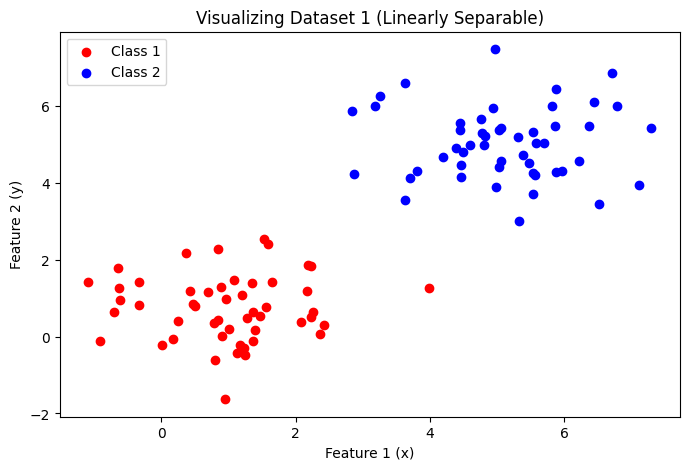

In [2]:
# Plotting the points
plt.figure(figsize=(8, 5))
plt.scatter(x_linear[y_linear == 0, 0], x_linear[y_linear == 0, 1], color='red', label='Class 1')
plt.scatter(x_linear[y_linear == 1, 0], x_linear[y_linear == 1, 1], color='blue', label='Class 2')

plt.title("Visualizing Dataset 1 (Linearly Separable)")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()

In [3]:
# Perceptron Implementation - simple form of neural network
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    # train the perceptron to learn the decision boundary
    def fit(self, x, y):
        n_samples, n_features = x.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for epoch in range(self.epochs):
            for i in range(n_samples):
                # Calculate prediction
                linear_output = np.dot(x[i], self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0

                # Update weights if prediction is wrong
                error = y[i] - prediction
                self.weights += self.learning_rate * error * x[i]
                self.bias += self.learning_rate * error

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def score(self, x, y):
        predictions = self.predict(x)
        return np.mean(predictions == y)

In [4]:
# Train perceptron on linearly separable data
perceptron_linear = Perceptron(learning_rate=0.1, epochs=100)
perceptron_linear.fit(x_linear, y_linear)

accuracy = perceptron_linear.score(x_linear, y_linear)
print(f"Accuracy on linear dataset: {accuracy * 100:.2f}%")

Accuracy on linear dataset: 100.00%


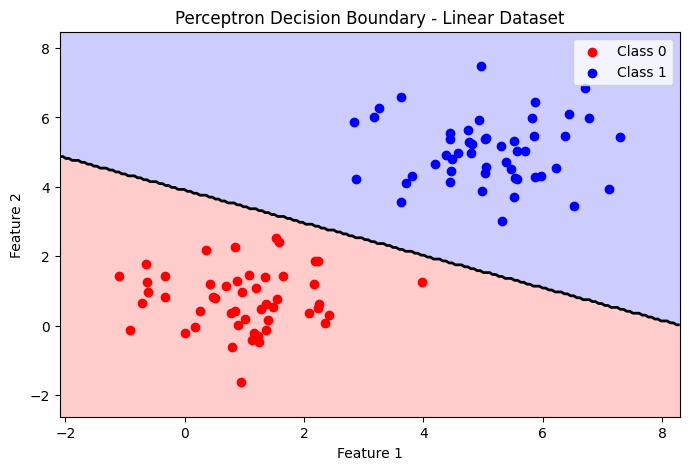

In [5]:
# Visualize decision boundary for linear data
def plot_decision_boundary(x, y, model, title):
    plt.figure(figsize=(8, 5))

    # Plot data points
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', label='Class 0')
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 1')

    # Create a mesh to plot decision boundary
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on mesh points
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx, yy, z, alpha=0.2, levels=[0, 0.5, 1], colors=['red', 'blue'])

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(x_linear, y_linear, perceptron_linear,
                      "Perceptron Decision Boundary - Linear Dataset")

What is XOR?
Exclusive OR (XOR) is non-linearly separable, unlike our previous linearly separable dataset. You cannot draw a single straight line to separate the first and second clusters/classification groups.

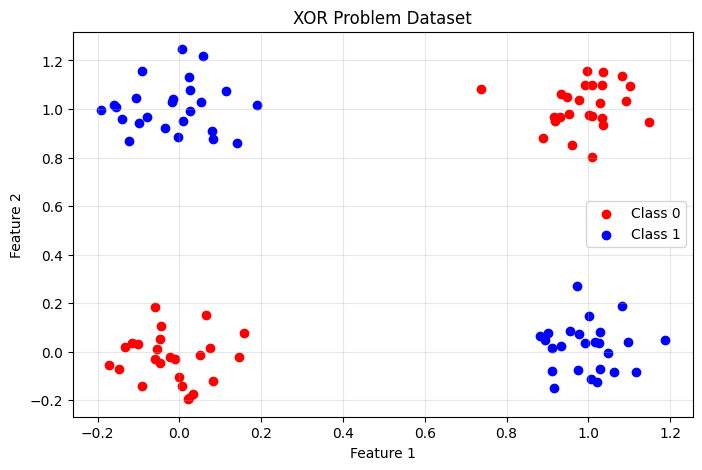

In [6]:
# Dataset 2: XOR Problem
np.random.seed(42)
points_per_cluster = 25

# Four clusters for XOR
c00 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 0])
c11 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 1])
c01 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 1])
c10 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 0])

x_xor = np.vstack([c00, c11, c01, c10])
y_xor = np.array([0]*50 + [1]*50)

# Visualize XOR data
plt.figure(figsize=(8, 5))
plt.scatter(x_xor[y_xor == 0, 0], x_xor[y_xor == 0, 1], color='red', label='Class 0')
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], color='blue', label='Class 1')
plt.title("XOR Problem Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Accuracy on XOR dataset: 50.00%


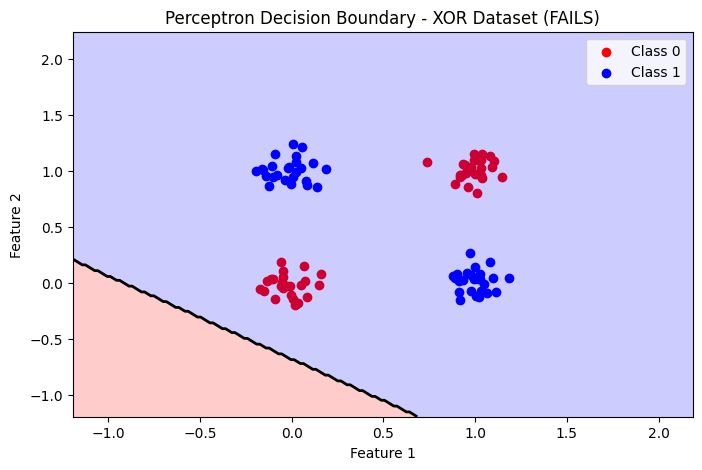

In [7]:
# Train perceptron on XOR (this will fail!)
perceptron_xor = Perceptron(learning_rate=0.1, epochs=100)
perceptron_xor.fit(x_xor, y_xor)

accuracy_xor = perceptron_xor.score(x_xor, y_xor)
print(f"Accuracy on XOR dataset: {accuracy_xor * 100:.2f}%")

plot_decision_boundary(x_xor, y_xor, perceptron_xor,
                      "Perceptron Decision Boundary - XOR Dataset (FAILS)")

MLP Accuracy on XOR: 100.00%


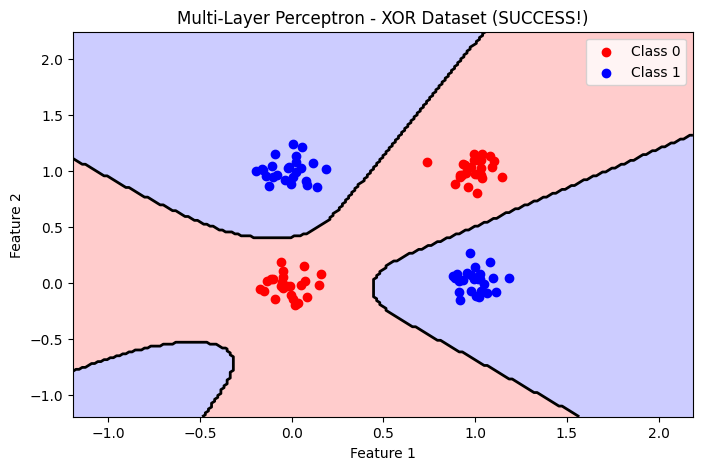

In [8]:
# EXTRA CREDIT: Solve XOR with a Multi-Layer Perceptron

class MLPerceptron:
    """
    Multi-Layer Perceptron with ONE hidden layer.

    KEY MODIFICATION: Adding a hidden layer allows the network to learn
    non-linear decision boundaries. The XOR problem is not linearly separable,
    meaning no single straight line can separate the classes. By adding a hidden
    layer, the network can combine multiple linear boundaries to create a
    non-linear decision boundary.
    """
    # Initialize the multi-layer perceptron
    # Hidden size is the number of helper perceptrons in the hidden layer
    # Learning rate how fast to learn
    def __init__(self, hidden_size=4, learning_rate=0.1, epochs=1000):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs
    # sigmoid activation function - convert to a number between zero and one
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    # The derivative of the sigmoid function, how much to adjust weight during learning
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    # Train the multi-layer perceptron using backpropagation
    def fit(self, x, y):
        n_samples, n_features = x.shape

        # Initialize weights randomly
        self.weights_input_hidden = np.random.randn(n_features, self.hidden_size) * 0.5
        self.bias_hidden = np.zeros(self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, 1) * 0.5
        self.bias_output = np.zeros(1)

        # Training loop
        for epoch in range(self.epochs):
            # Forward pass - send data through network to make predictions
            hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
            # Apply sigmoid to make it non-linear
            hidden_output = self.sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
            final_output = self.sigmoid(final_input)

            # Backward pass (backpropagation) - calculate and adjust weights
            output_error = y.reshape(-1, 1) - final_output
            output_delta = output_error * self.sigmoid_derivative(final_output)

            hidden_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

            # Update weights - adjust weights to reduce error
            self.weights_hidden_output += hidden_output.T.dot(output_delta) * self.learning_rate
            self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
            self.weights_input_hidden += x.T.dot(hidden_delta) * self.learning_rate
            self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate
    # Make predictions using the trained network
    def predict(self, x):
        hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        # convert probability to class label
        return (final_output > 0.5).astype(int).flatten()

# Train MLP on XOR
mlp_xor = MLPerceptron(hidden_size=4, learning_rate=0.5, epochs=2000)
mlp_xor.fit(x_xor, y_xor)

accuracy_mlp = np.mean(mlp_xor.predict(x_xor) == y_xor)
print(f"MLP Accuracy on XOR: {accuracy_mlp * 100:.2f}%")

plot_decision_boundary(x_xor, y_xor, mlp_xor,
                      "Multi-Layer Perceptron - XOR Dataset (SUCCESS!)")

Why a single perceptron fails on XOR:
- A perceptron can only learn a linear decision boundary (a straight line)
- The XOR problem requires a non-linear boundary
- No single straight line can separate the XOR classes

What was modified to solve XOR:
1. Added a hidden layer with 4 neurons
2. Used sigmoid activation function (non-linear)
3. Implemented backpropagation for training

How this solves XOR:
- The hidden layer creates multiple linear boundaries
- These boundaries combine to form a non-linear decision surface
- This allows the network to separate the XOR pattern successfully